# Spotify Tracks Dataset

In [54]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sbn

import kagglehub
from kagglehub import KaggleDatasetAdapter

In [ ]:

# Download latest version from Kaggle and show the path
# Optional, can be gotten from our GitHub as well.
# path = kagglehub.dataset_download("yamaerenay/spotify-dataset-1921-2020-160k-tracks")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Lukas\.cache\kagglehub\datasets\yamaerenay\spotify-dataset-1921-2020-160k-tracks\versions\1


### Storing the dataset

In [70]:
# Read the dataset and show five first records to see that it is loaded correctly and get initial overview of the data
#df = pd.read_csv("/Users/Lukas/.cache/kagglehub/datasets/yamaerenay/spotify-dataset-1921-2020-160k-tracks/versions/1/data.csv")
url = "https://raw.githubusercontent.com/LukasRonberg/BusinessIntelligence/refs/heads/main/MP1/Datasets/spotifydata.csv"

df = pd.read_csv(url)

df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921.0,NaN,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667.0,0.211,0.0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921.0,0.732,['Dennis Day'],0.819,180533.0,0.341,0.0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1.0,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921.0,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062.0,0.166,0.0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1.0,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921.0,0.967,['Frank Parker'],0.275,210000.0,0.309,0.0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1.0,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921.0,0.957,['Phil Regan'],0.418,166693.0,0.193,0.0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1.0,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


### Exploring the dataset

In [71]:
# Shows the total amount of rows in the dataset
df.index

RangeIndex(start=0, stop=170653, step=1)

In [72]:
# Use columns to see the datasets columns
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [73]:
# Check the types of the columns

df.dtypes

valence             float64
year                float64
acousticness        float64
artists              object
danceability        float64
duration_ms         float64
energy              float64
explicit            float64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                float64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

In [74]:
# Remove default pandas integer id and set the tracks unique id as primary index

df.set_index('id', inplace= True)
df.head()

# Optional reset of the index if needed
#df.reset_index(inplace=True)
#df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
id,,,,,,,,,,,,,,,,,,
4BJqT0PrAfrxzMOxytFOIz,0.0594,1921.0,NaN,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667.0,0.211,0.0,0.878000,10,0.665,-20.096,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
7xPhfUan2yNtyFG0cUWkt8,0.9630,1921.0,0.732,['Dennis Day'],0.819,180533.0,0.341,0.0,0.000000,7,0.160,-12.441,1.0,Clancy Lowered the Boom,5,1921,0.4150,60.936
1o6I8BglA6ylDMrIELygv1,0.0394,1921.0,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062.0,0.166,0.0,0.913000,3,0.101,-14.850,1.0,Gati Bali,5,1921,0.0339,110.339
3ftBPsC5vPBKxYSee08FDH,0.1650,1921.0,0.967,['Frank Parker'],0.275,210000.0,0.309,0.0,0.000028,5,0.381,-9.316,1.0,Danny Boy,3,1921,0.0354,100.109
4d6HGyGT8e121BsdKmw9v6,0.2530,1921.0,0.957,['Phil Regan'],0.418,166693.0,0.193,0.0,0.000002,3,0.229,-10.096,1.0,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


### Data Cleaning - 1
#### Removing all data that is incomplete

In [75]:
# To check for any values missing, we check if they are na and then get the sum of the values that are na:
df.isna().sum()

valence             0
year                1
acousticness        2
artists             0
danceability        1
duration_ms         3
energy              1
explicit            1
instrumentalness    2
key                 0
liveness            0
loudness            0
mode                1
name                0
popularity          0
release_date        1
speechiness         1
tempo               2
dtype: int64

In [ ]:

# If the data is incomplete and we simply wish to remove the entire row of data, we can run this command:
df = df.dropna()

In [ ]:
# Then we check for missing values again, there should be none now
df.isna().sum()

### Data Cleaning - 2
#### Replacing missing values

First I want to check if the data is skewed and has a lot of outliers. One way to do this is use a boxplot

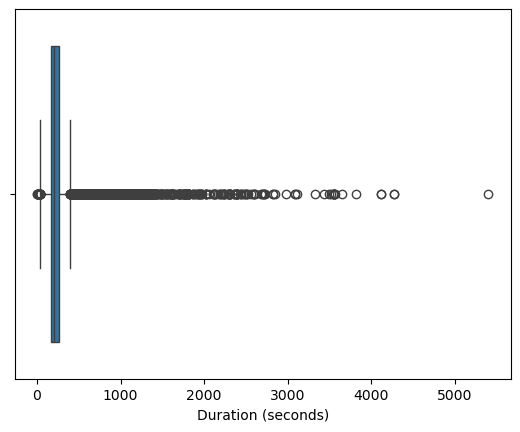

In [96]:
sbn.boxplot(x=df['duration_ms'] / 1000)
plt.xlabel("Duration (seconds)")
plt.show()


The boxplot has a lot of outliers. The boxplot indicates that the majority of the tracks are within 2-5 minutes long, but it has a lot of outliers of songs that are much longer. In this case, using the median is the best.

 Using the median involves calculating the middle value of a column’s available data (which is less sensitive to outliers) and replacing any missing entries with that value.

In [77]:
median_duration_ms = df.duration_ms.median()

print(median_duration_ms)

207467.0


In [78]:
# Fill the missing values with the median
df['duration_ms'] = df['duration_ms'].fillna(median_duration_ms)

In [79]:
#Check for null values again, after filling them with the median
df['duration_ms'].isna().sum()

0

Using the mean involves calculating the average value of a column’s available data and replacing any missing entries with that average. If the data has few outliers, this is the best method to use. In our case, median was the best, but this is how we would impute with the mean data

In [46]:
# Store duration_ms column's mean in a variable
mean_duration_ms = df.duration_ms.mean()

print(mean_duration_ms)

230949.29266920598


In [ ]:
# Fill the duration_ms with the mean
df['duration_ms'] = df['duration_ms'].fillna(mean_duration_ms)

In [80]:
#Check for null values again, after filling them with the median
df['duration_ms'].isna().sum()

0

### Data Cleaning - 3
#### Removing extreme outliers

As we saw in the boxplot for the duration in milliseconds, there were some pretty big outliers. To remove them, I will define Q1 (25th percentile) and Q3 (75th percentile) and get the IQR. IQR is the difference between Q3 and Q1, giving the range where the middle 50% of the data is

In [81]:
Q1 = df["duration_ms"].quantile(0.25)
Q3 = df["duration_ms"].quantile(0.75)
IQR = Q3 - Q1

Then we define our upper and lower fence. Anything below the lower fence or above the upper fence, is considered an outlier. I have set the upper fence to be a bit lower, to remove more of the extreme outliers.

In [93]:
Lower_Fence = Q1 - 1.5 * IQR
Upper_Fence = Q3 + 1.5 * IQR

print("Lower Fence:", Lower_Fence)
print("Upper Fence:", Upper_Fence)

Lower Fence: 30967.5
Upper Fence: 401259.5


Then we filter out the outliers

In [94]:
df_filtered = df[(df["duration_ms"] >= Lower_Fence) & (df["duration_ms"] <= Upper_Fence)]

And show the boxplot again, to check and see the outliers being removed

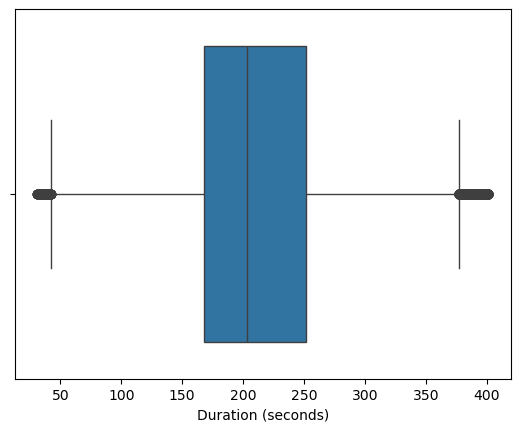

In [95]:
sbn.boxplot(x=df_filtered['duration_ms'] / 1000)
plt.xlabel("Duration (seconds)")
plt.show()
